In [157]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv("formatted_data.csv")
df_clean = df.drop(columns=["Unnamed: 0"], errors="ignore") # dropping the index column

boolean_columns = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
df_clean[boolean_columns] = df_clean[boolean_columns].apply(lambda x: x.map({"yes": 1, "no":0})) #converting boolean data to numerical data representations

categorical_columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "result"]
df_encoded = pd.get_dummies(df_clean, columns = categorical_columns, drop_first= True ) #one-hot encoded (dummy) variables to handle categorical data

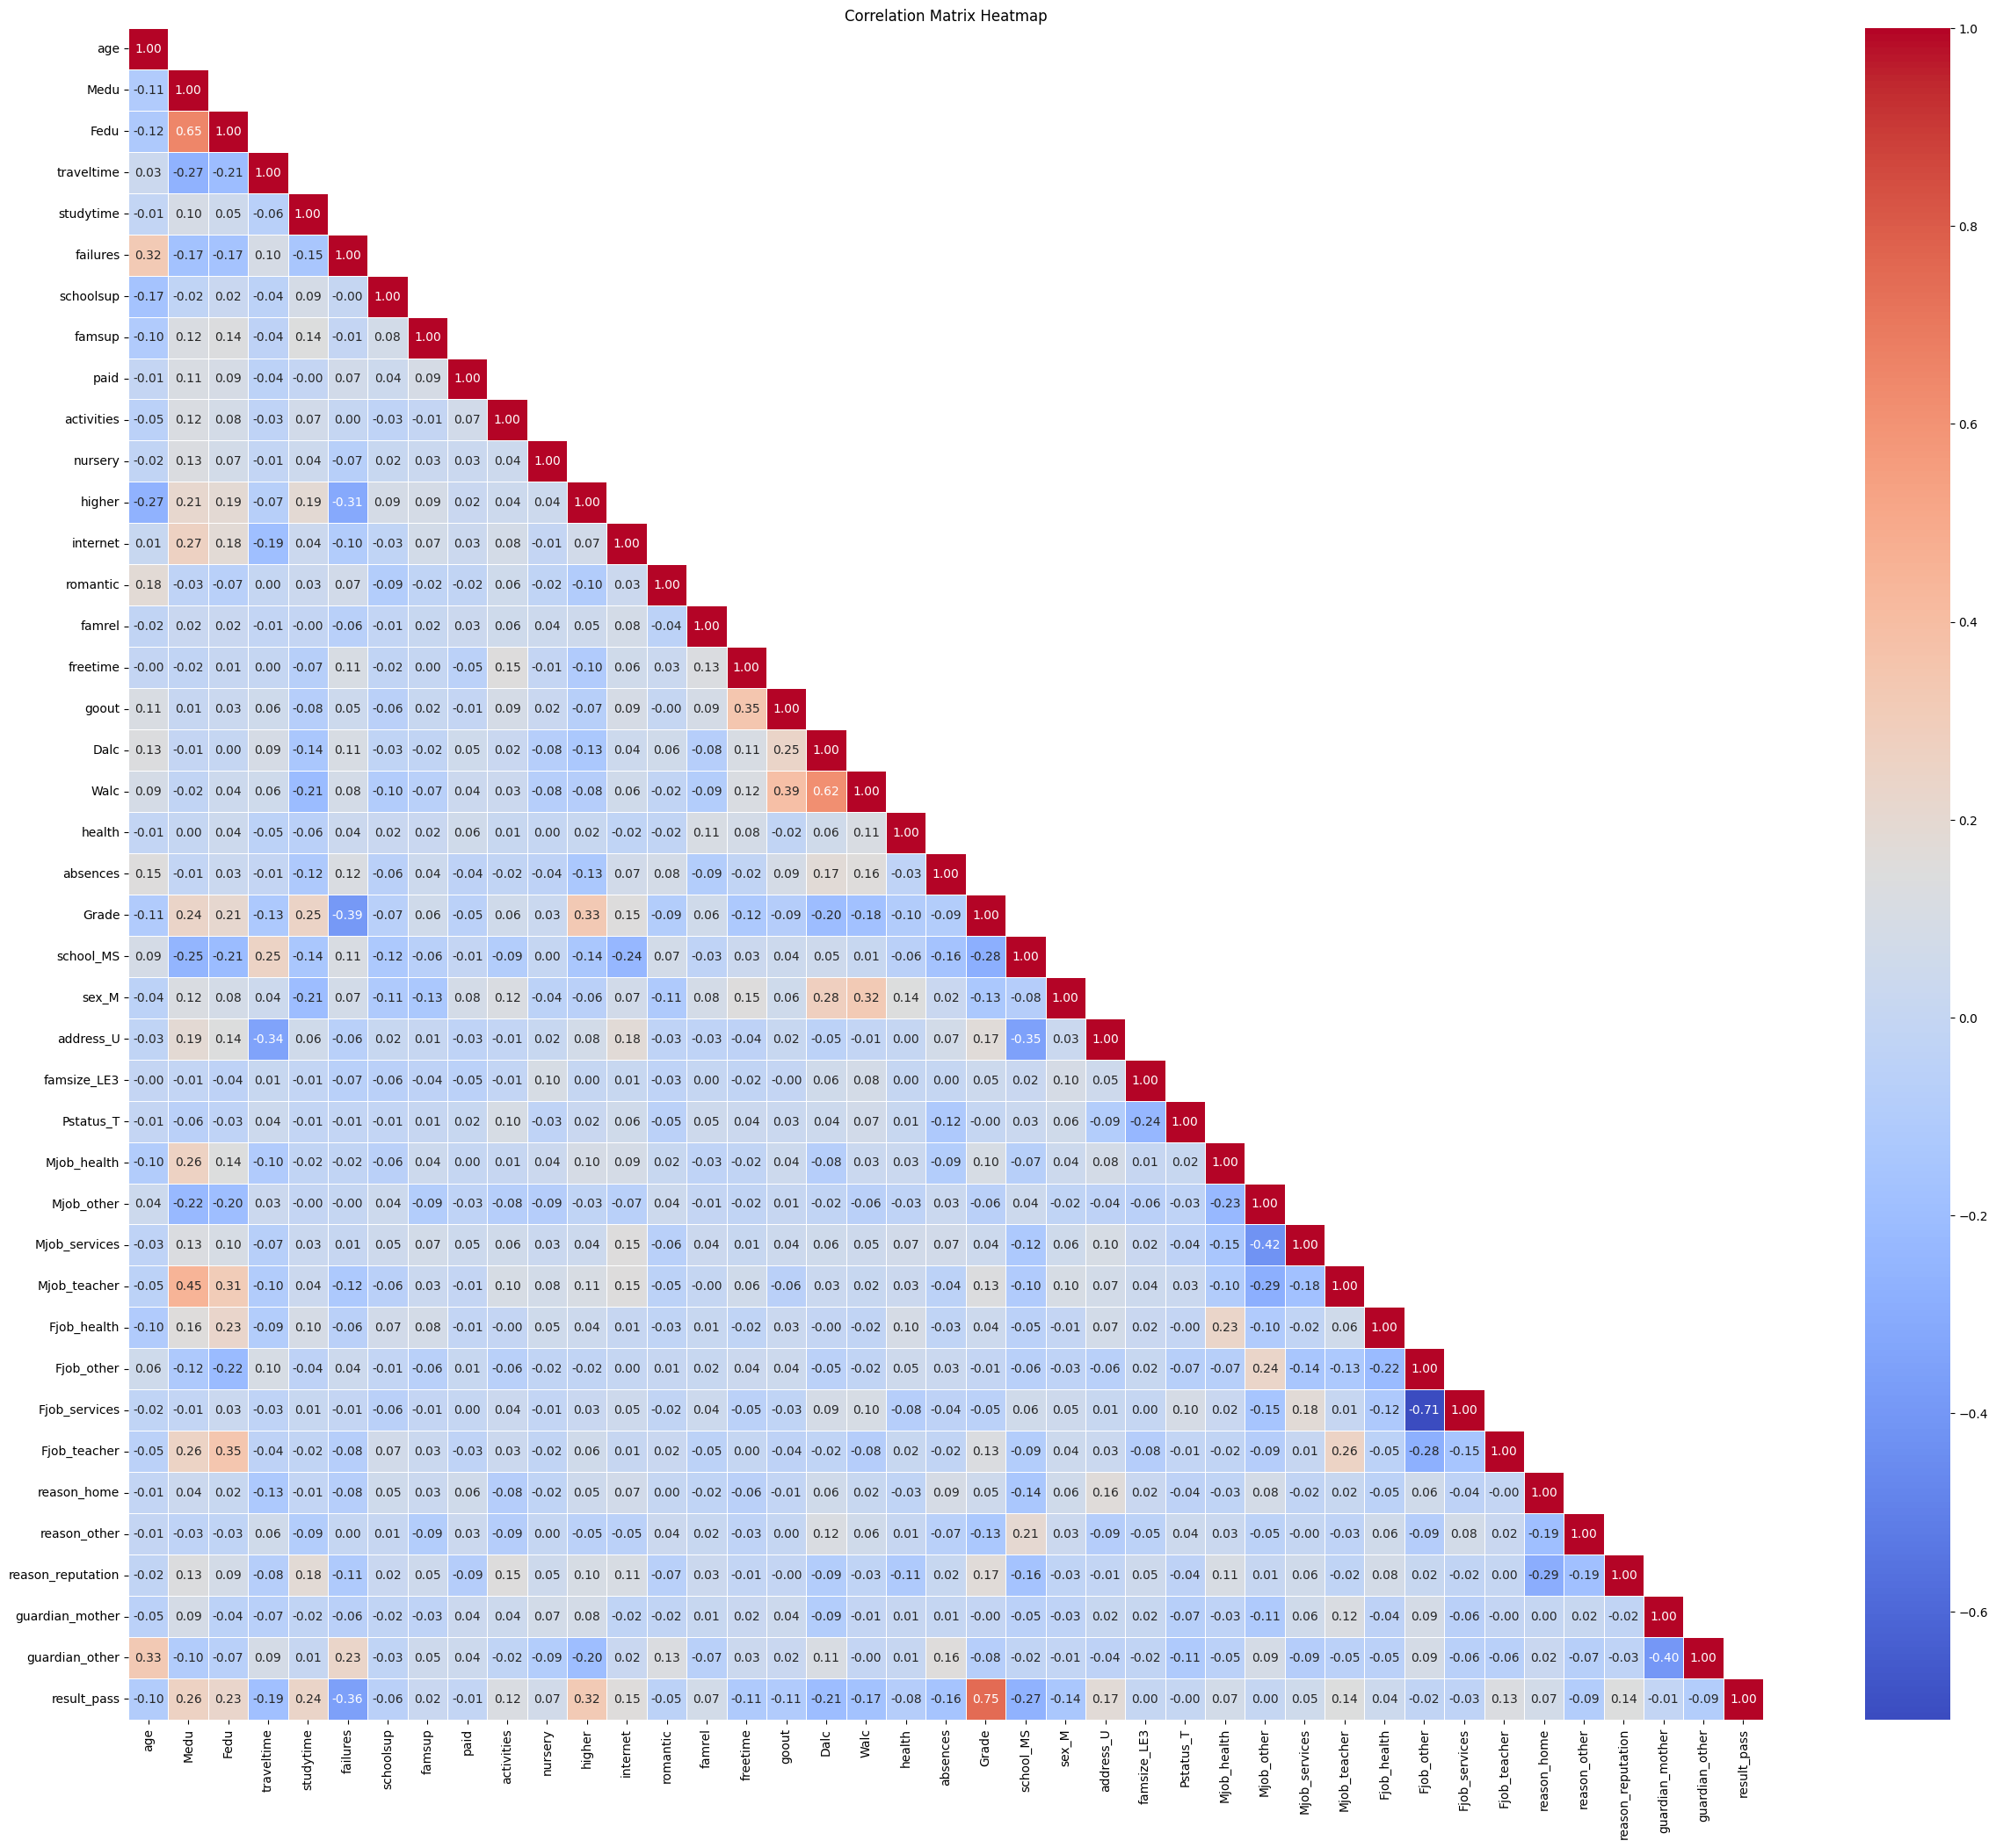

In [159]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(30,25))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1) #hides the upper triangle apart from the 1-1 correlation with itself
sns.heatmap (correlation_matrix, mask = mask, cmap= "coolwarm", annot = True, fmt= ".2f", linewidths= 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [160]:
print(df_encoded.dtypes)
print(df_encoded.columns)
print(df_encoded.head())

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
Grade                int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
r

In [161]:
import statsmodels.api as sm

"""Significance of Parent's Categories to Results"""

bool_columns = [
    'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other', 'result_pass'
]

# Converted boolean to numeric (1/0)
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

X = df_encoded[['Medu', 'Fedu', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'Dalc', 'Walc' ]]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())
# (P>|z|): If p < 0.05, the feature significantly affects passing.


# df['result'] = df['result'].map({'pass': 1, 'fail': 0})
# X = df[['Medu', 'Fedu']]
# X = sm.add_constant(X)  

# y = df['result']

# Logistic Regression
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# print(result.summary())


Optimization terminated successfully.
         Current function value: 0.614806
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           12
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.1097
Time:                        14:50:08   Log-Likelihood:                -399.01
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 1.208e-15
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8362      0.427     -1.960      0.050      -1.673       0.000
Medu              0.

In [162]:
"""Significance of Student Categories to Results"""

X = df_encoded[['age','traveltime', 'studytime', 'failures',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
        'internet', 'romantic', 'famrel', 'freetime', 'goout',
        'health', 'absences', 'school_MS', 'sex_M', 'address_U',
        'famsize_LE3', 'Pstatus_T', 'reason_home', 'reason_other',
        'reason_reputation', 'guardian_mother', 'guardian_other']]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485505
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           27
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.2969
Time:                        14:50:12   Log-Likelihood:                -315.09
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 3.750e-41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9288      1.826     -1.604      0.109      -6.508       0.651
age     

In [163]:
"""Combination of Parent's and Student's Caegories to Results"""

X = df_encoded[['Medu', 'Fedu', 'Mjob_health', 'Mjob_other','Mjob_services', 'Mjob_teacher', 
        'Fjob_health', 'Fjob_other','Fjob_services', 'Fjob_teacher', 'Dalc', 'Walc', 
        'age','traveltime', 'studytime', 'failures','schoolsup', 'famsup', 
        'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
        'famrel', 'freetime', 'goout', 'health', 'absences', 'school_MS', 
        'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'reason_home', 'reason_other',
        'reason_reputation', 'guardian_mother', 'guardian_other']]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.463765
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                           39
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.3284
Time:                        14:50:16   Log-Likelihood:                -300.98
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 6.400e-41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6236      1.955     -1.854      0.064      -7.455       0.207
Medu    